In [2]:
from surprise import Reader, Dataset, KNNBasic, accuracy, SVD
from surprise.model_selection import KFold
from surprise.model_selection.validation import cross_validate
import pandas as pd
import os
from matplotlib import pyplot as plt

In [3]:
# read in data
ratings_df = pd.read_csv('./archive/ratings_small.csv')
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

In [4]:
# perform 5-fold cross-validation using KNNBasic
kf = KFold(n_splits=5)
algo = KNNBasic()
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    accuracy.rmse(predictions, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9715
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9813
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9632
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9592
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9685


In [5]:
# unbiased SVD leads to PMF
algo = SVD(biased=False)

# cross_validate() uses n-fold cross-validation based on what's passed
# to cv
cv = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5)
rmse_mean = cv["test_rmse"].mean()
mae_mean = cv["test_mae"].mean()
print(f'RMSE Mean Accuracy: {rmse_mean}')
print(f'MAE Mean Accuracy: {mae_mean}')

RMSE Mean Accuracy: 1.012176499432736
MAE Mean Accuracy: 0.7815845224014015


In [6]:
# user-based collaborative filtering
# using MSD similarity
sim_options = {
    "name": "MSD",
    "user_based": True
}
algo = KNNBasic(sim_optons=sim_options)
cv = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5)
rmse_mean = cv["test_rmse"].mean()
mae_mean = cv["test_mae"].mean()
print(f'RMSE Mean Accuracy: {rmse_mean}')
print(f'MAE Mean Accuracy: {mae_mean}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE Mean Accuracy: 0.9687354246579574
MAE Mean Accuracy: 0.7442880683634725


In [7]:
# user-based collaborative filtering
# using cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": True
}
algo = KNNBasic(sim_optons=sim_options)
cv = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5)
rmse_mean = cv["test_rmse"].mean()
mae_mean = cv["test_mae"].mean()
print(f'RMSE Mean Accuracy: {rmse_mean}')
print(f'MAE Mean Accuracy: {mae_mean}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE Mean Accuracy: 0.967382658838118
MAE Mean Accuracy: 0.7437414063340929


In [8]:
# user based collaborative filtering
# using pearson similarity
sim_options = {
    "name": "pearson",
    "user_based": True
}
algo = KNNBasic(sim_optons=sim_options)
cv = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5)
rmse_mean = cv["test_rmse"].mean()
mae_mean = cv["test_mae"].mean()
print(f'RMSE Mean Accuracy: {rmse_mean}')
print(f'MAE Mean Accuracy: {mae_mean}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE Mean Accuracy: 0.967259240408335
MAE Mean Accuracy: 0.7435410295711263


In [9]:
# item-based collaborative filtering
# using MSD
sim_options = {
    "name": "MSD",
    "user_based": False
}
algo = KNNBasic(sim_optons=sim_options)
cv = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5)
rmse_mean = cv["test_rmse"].mean()
mae_mean = cv["test_mae"].mean()
print(f'RMSE Mean Accuracy: {rmse_mean}')
print(f'MAE Mean Accuracy: {mae_mean}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE Mean Accuracy: 0.9664262010555518
MAE Mean Accuracy: 0.7428834387267839


In [10]:
# Item-based collaborative filteirng
# using cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False
}
algo = KNNBasic(sim_optons=sim_options)
cv = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5)
rmse_mean = cv["test_rmse"].mean()
mae_mean = cv["test_mae"].mean()
print(f'RMSE Mean Accuracy: {rmse_mean}')
print(f'MAE Mean Accuracy: {mae_mean}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE Mean Accuracy: 0.9674977946684322
MAE Mean Accuracy: 0.7434453277535974


In [12]:
# Item-base collaborative filtering
# using pearson similarity
sim_options = {
    "name": "pearson",
    "user_based": False
}
algo = KNNBasic(sim_optons=sim_options)
cv = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5, verbose=True)
rmse_mean = cv["test_rmse"].mean()
mae_mean = cv["test_mae"].mean()
print(f'RMSE Mean Accuracy: {rmse_mean}')
print(f'MAE Mean Accuracy: {mae_mean}')
print(cv)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9747  0.9744  0.9705  0.9563  0.9667  0.9685  0.0068  
MAE (testset)     0.7521  0.7464  0.7473  0.7333  0.7436  0.7445  0.0062  
Fit time          0.05    0.05    0.05    0.05    0.05    0.05    0.00    
Test time         0.52    0.56    0.56    0.60    0.54    0.56    0.03    
RMSE Mean Accuracy: 0.9685149000796542
MAE Mean Accuracy: 0.7445462500871707
{'test_rmse': array([0.97468641, 0.97439345, 0.97050055, 0.95628982, 0.96670427]), 'test_mae': array([0.75210091, 0.74642888

In [106]:
plt.style.use('seaborn')

/tmp/ipykernel_28134/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

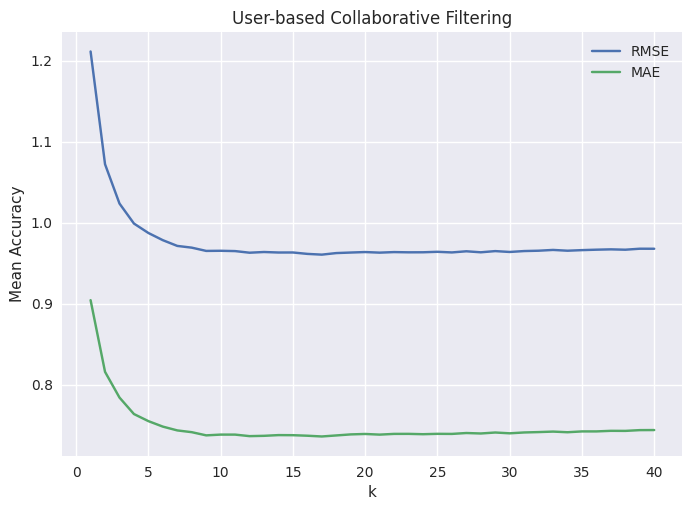

In [110]:
# Plotting Mean RMSE Accuracy and MAE Mean Accuracy
# using different values of k for user-based
# collaborative filtering.
sim_options = {
    "user_based": True
}
k_vals = [k for k in range(1, 41)]
rmse_means = []
mae_means = []
for k in k_vals:
    algo = KNNBasic(k=k, sim_options=sim_options)
    cv = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5)
    rmse_mean = cv["test_rmse"].mean()
    rmse_means.append(rmse_mean)
    mae_mean = cv["test_mae"].mean()
    mae_means.append(mae_mean)

fig, ax = plt.subplots()
ax.set_title("User-based Collaborative Filtering")
ax.set_xlabel("k")
ax.set_ylabel("Mean Accuracy")
ax.plot(k_vals, rmse_means, label='RMSE')
ax.plot(k_vals, mae_means, label='MAE')
ax.legend()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd

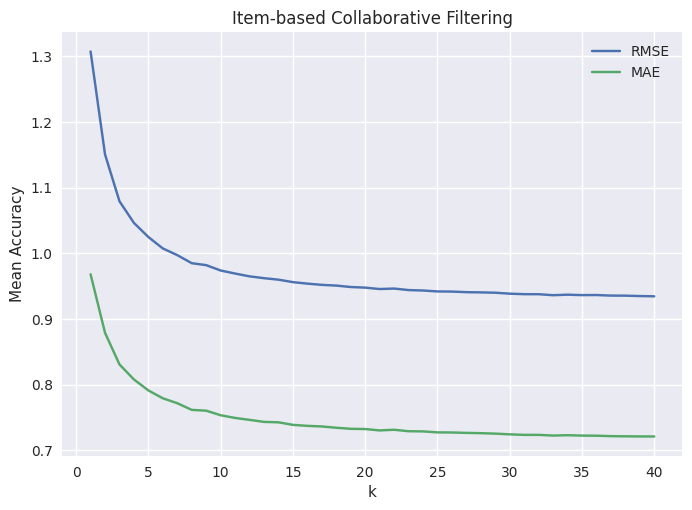

In [111]:
# Plotting Mean RMSE Accuracy and MAE Mean Accuracy
# using different values of k for item-based
# collaborative filtering.
sim_options = {
    "user_based": False
}
k_vals = [k for k in range(1, 41)]
rmse_means = []
mae_means = []
for k in k_vals:
    algo = KNNBasic(k=k, sim_options=sim_options)
    cv = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5)
    rmse_mean = cv["test_rmse"].mean()
    rmse_means.append(rmse_mean)
    mae_mean = cv["test_mae"].mean()
    mae_means.append(mae_mean)

fig, ax = plt.subplots()
ax.set_title("Item-based Collaborative Filtering")
ax.set_xlabel("k")
ax.set_ylabel("Mean Accuracy")
ax.plot(k_vals, rmse_means, label='RMSE')
ax.plot(k_vals, mae_means, label='MAE')
ax.legend()